In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv("/content/country_wise_latest.csv")
covid

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [3]:
covid.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [5]:
total = covid[["Confirmed","Deaths","Recovered","Active"]].sum()    # total confirmed cases and deaths and recovered and active
print("Total confirmed cases: ", total["Confirmed"])
print("Total death cases: ", total["Deaths"])
print("Total recovered cases: ", total["Recovered"])
print("Total active cases: ", total["Active"])


Total confirmed cases:  16480485
Total death cases:  654036
Total recovered cases:  9468087
Total active cases:  6358362


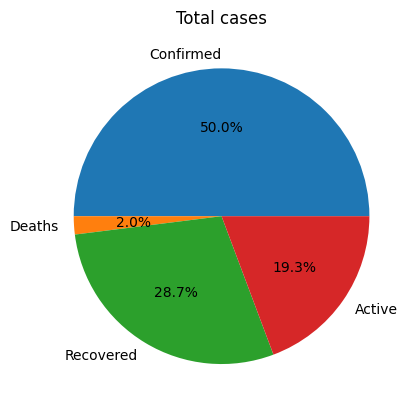

In [6]:
plt.pie(total, labels = total.index, autopct = "%1.1f%%")
plt.title("Total cases")
plt.show()

In [7]:
confirmed = covid.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False)  #  confirmed cases by country
confirmed.head(50)

,Confirmed
Country/Region,
US,4290259
Brazil,2442375
India,1480073
Russia,816680
South Africa,452529
Mexico,395489
Peru,389717
Chile,347923
United Kingdom,301708


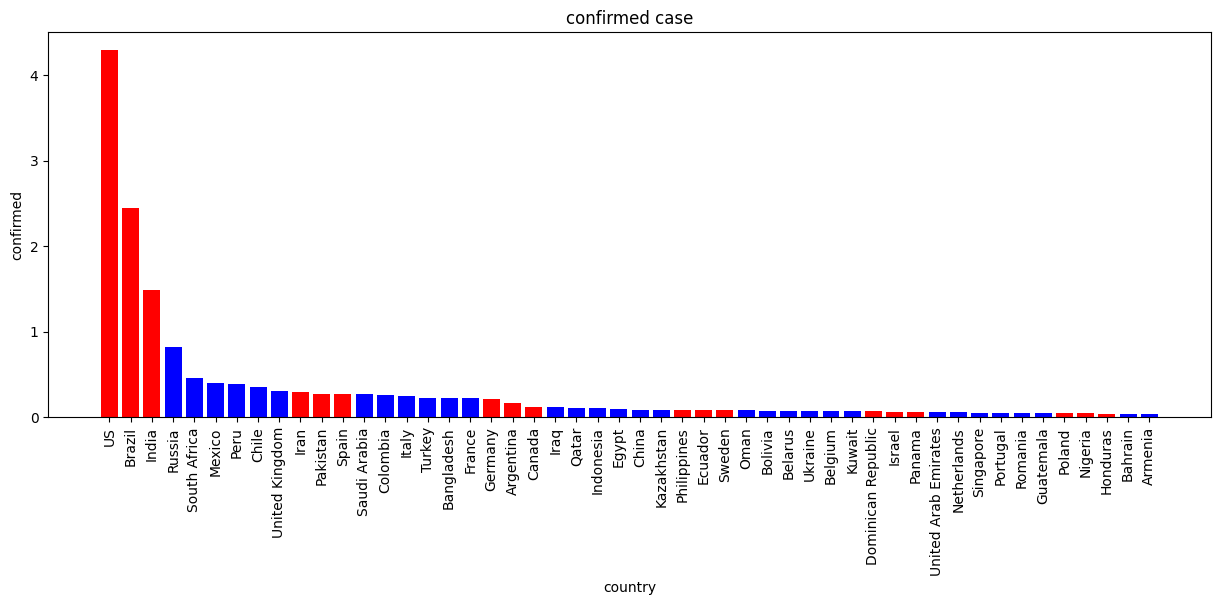

In [8]:
topregion = confirmed.sort_values(ascending=False).head(50)
colors = ["blue"]*len("topregion")
colors[0] = "red"
colors[1] = "red"
colors[2] = "red"
plt.figure(figsize=(15,5))
plt.bar(topregion.index,topregion.values/1e6, color = colors)
plt.xlabel("country")
plt.ylabel("confirmed")
plt.title("confirmed case")
plt.xticks(rotation = 90)
plt.show()

In [9]:
death = covid.groupby("Country/Region")["Deaths"].sum().sort_values(ascending=False)  # total death by country
death.head(50)

,Deaths
Country/Region,
US,148011
Brazil,87618
United Kingdom,45844
Mexico,44022
Italy,35112
India,33408
France,30212
Spain,28432
Peru,18418


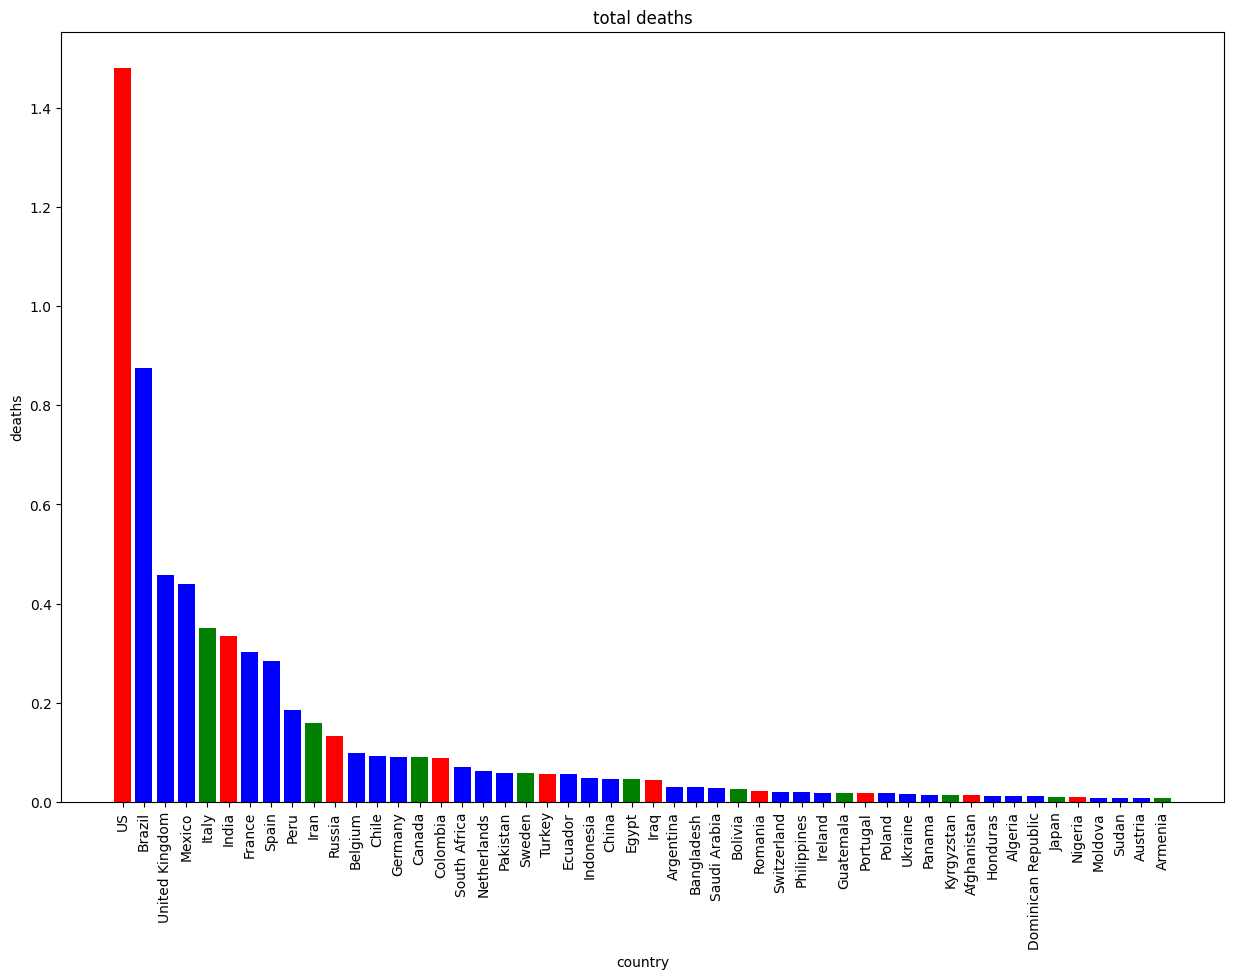

In [11]:
total = death.sort_values(ascending=False).head(50)
colors = ["blue"]*len("total")
colors[0] = "red"
colors[-1] = "green"

plt.figure(figsize=(15,10))
plt.bar(total.index, total.values/1e5, color = colors)
plt.xlabel("country")
plt.ylabel("deaths")
plt.title("total deaths")
plt.xticks(rotation = 90)
plt.show()

In [12]:
recovered = covid.groupby("Country/Region")["Recovered"].sum().sort_values(ascending=False)  # total recovered by country
recovered.head(50)

,Recovered
Country/Region,
Brazil,1846641
US,1325804
India,951166
Russia,602249
Chile,319954
Mexico,303810
South Africa,274925
Peru,272547
Iran,255144


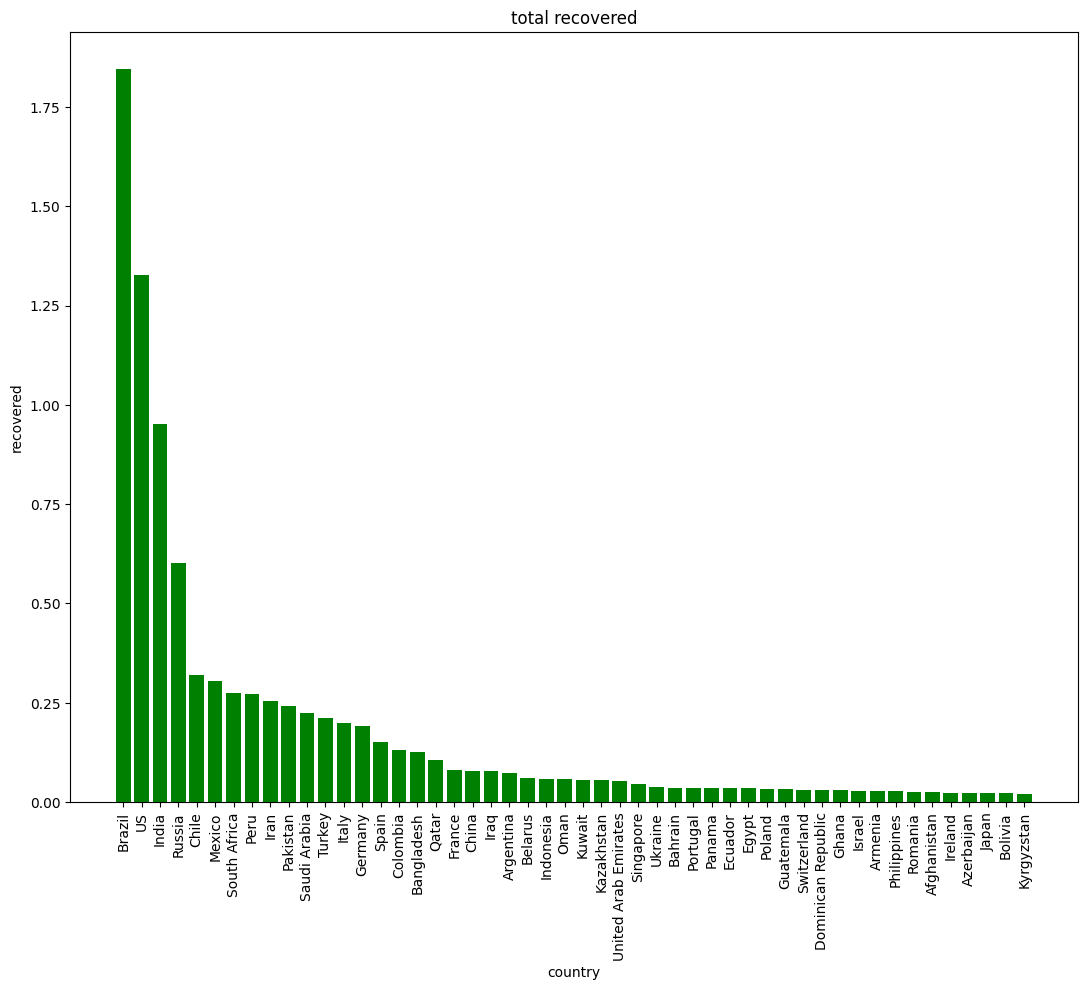

In [13]:
total = recovered.sort_values(ascending=False).head(50)

plt.figure(figsize=(13,10))
plt.bar(total.index,total.values/1e6,color = "green")
plt.xlabel("country")
plt.ylabel("recovered")
plt.title("total recovered")
plt.xticks(rotation = 90)
plt.show()

In [14]:
active = covid.groupby("Country/Region")["Active"].sum().sort_values(ascending=False)  # total active cases by country
active.head(50)

,Active
Country/Region,
US,2816444
Brazil,508116
India,495499
United Kingdom,254427
Russia,201097
South Africa,170537
Colombia,117163
France,108928
Canada,107514


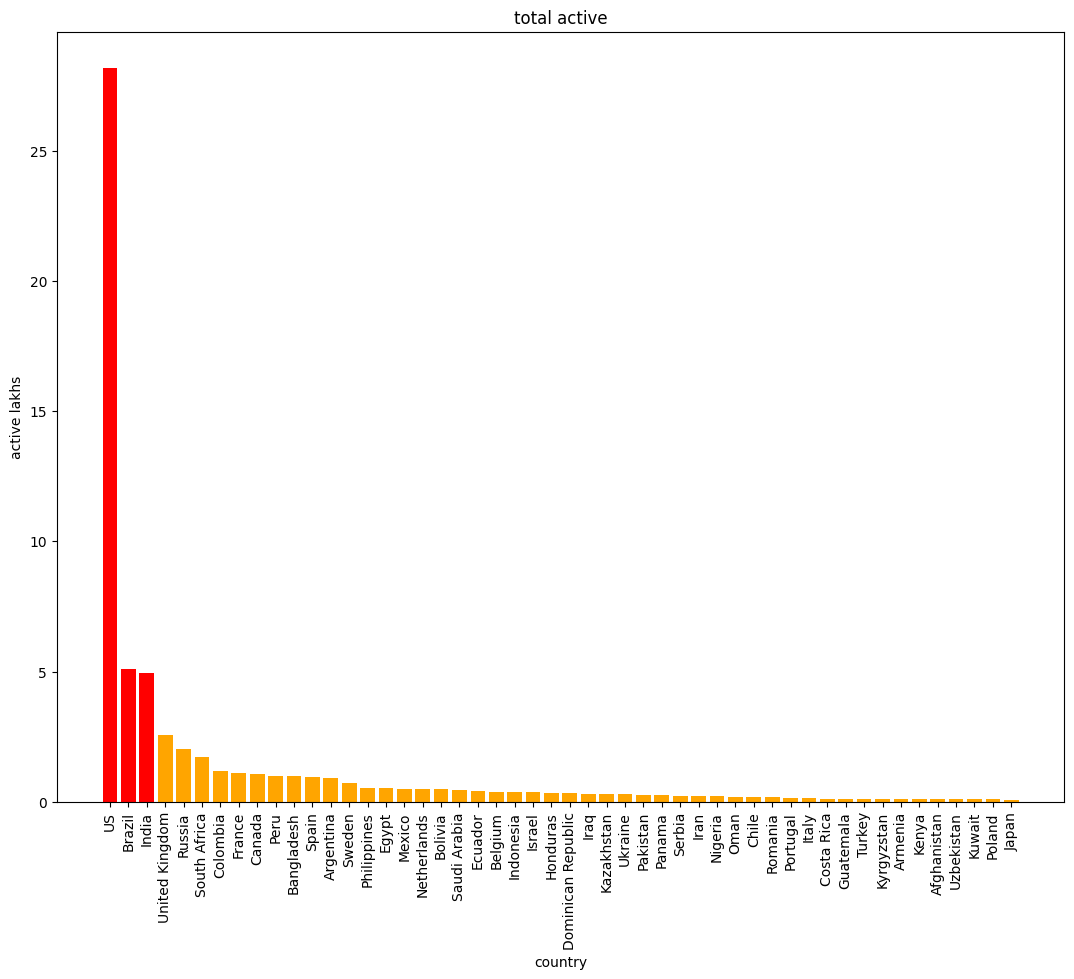

In [15]:
total = active.sort_values(ascending=False).head(50)
colors = ["red" if val > 450000 else "orange" for val in total]
plt.figure(figsize = (13,10))
plt.bar(total.index,total.values/1e5, color = colors)
plt.xlabel("country")
plt.ylabel("active lakhs")
plt.title("total active")
plt.xticks(rotation = 90)
plt.show()

In [16]:
cases = covid.groupby("Country/Region")["New cases"].sum().sort_values(ascending=False)   # new cases by country
cases.head(50)

,New cases
Country/Region,
US,56336
India,44457
Brazil,23284
Colombia,16306
Peru,13756
South Africa,7096
Russia,5607
Mexico,4973
Argentina,4890


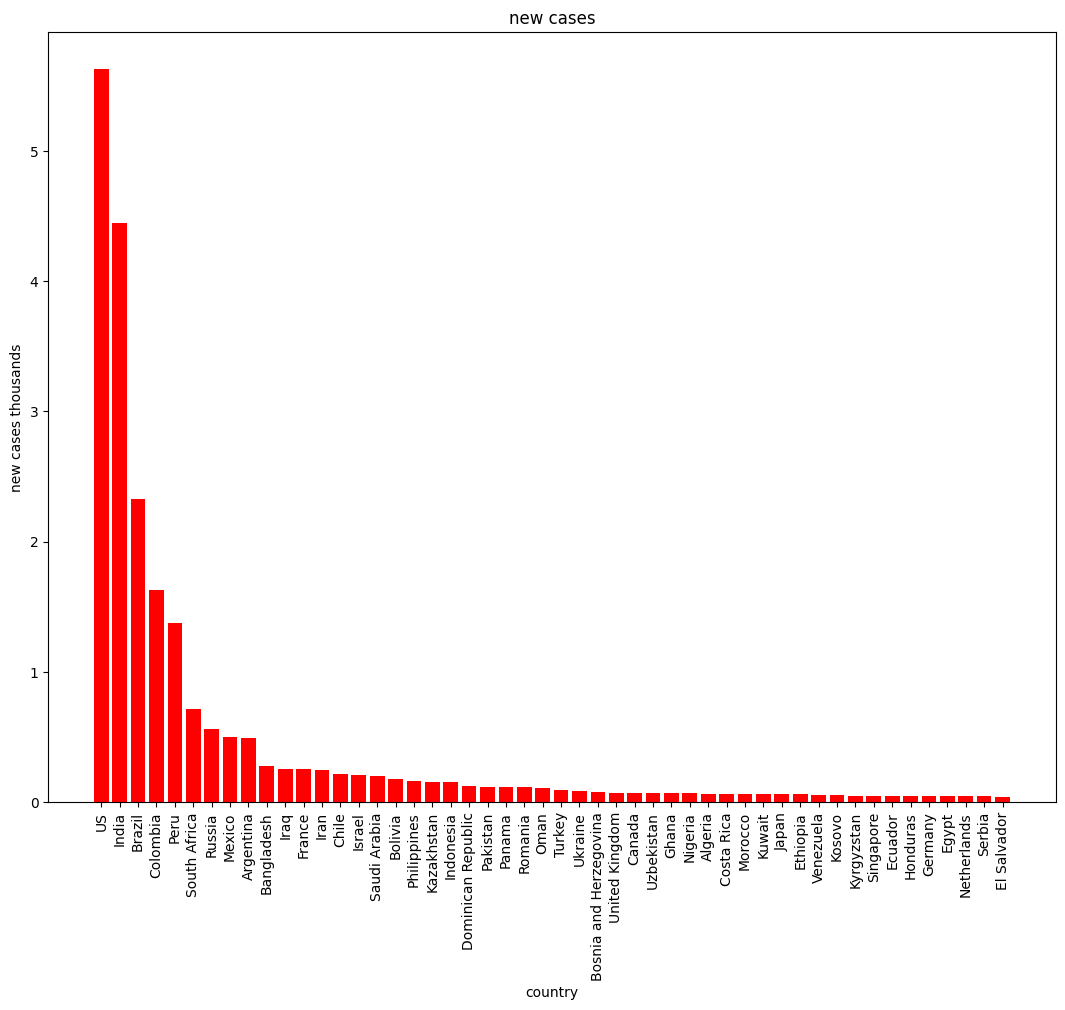

In [17]:
total = cases.sort_values(ascending=False).head(50)
plt.figure(figsize=(13,10))
plt.bar(total.index,total.values/1e4, color = "red")
plt.xlabel("country")
plt.ylabel("new cases thousands")
plt.title("new cases")
plt.xticks(rotation = 90)
plt.show()

In [18]:
new_death = covid.groupby("Country/Region")["New deaths"].sum().sort_values(ascending=False)   # total new death by country
new_death.head(60)

,New deaths
Country/Region,
US,1076
India,637
Brazil,614
Peru,575
Colombia,508
Mexico,342
South Africa,298
Iran,212
Argentina,120


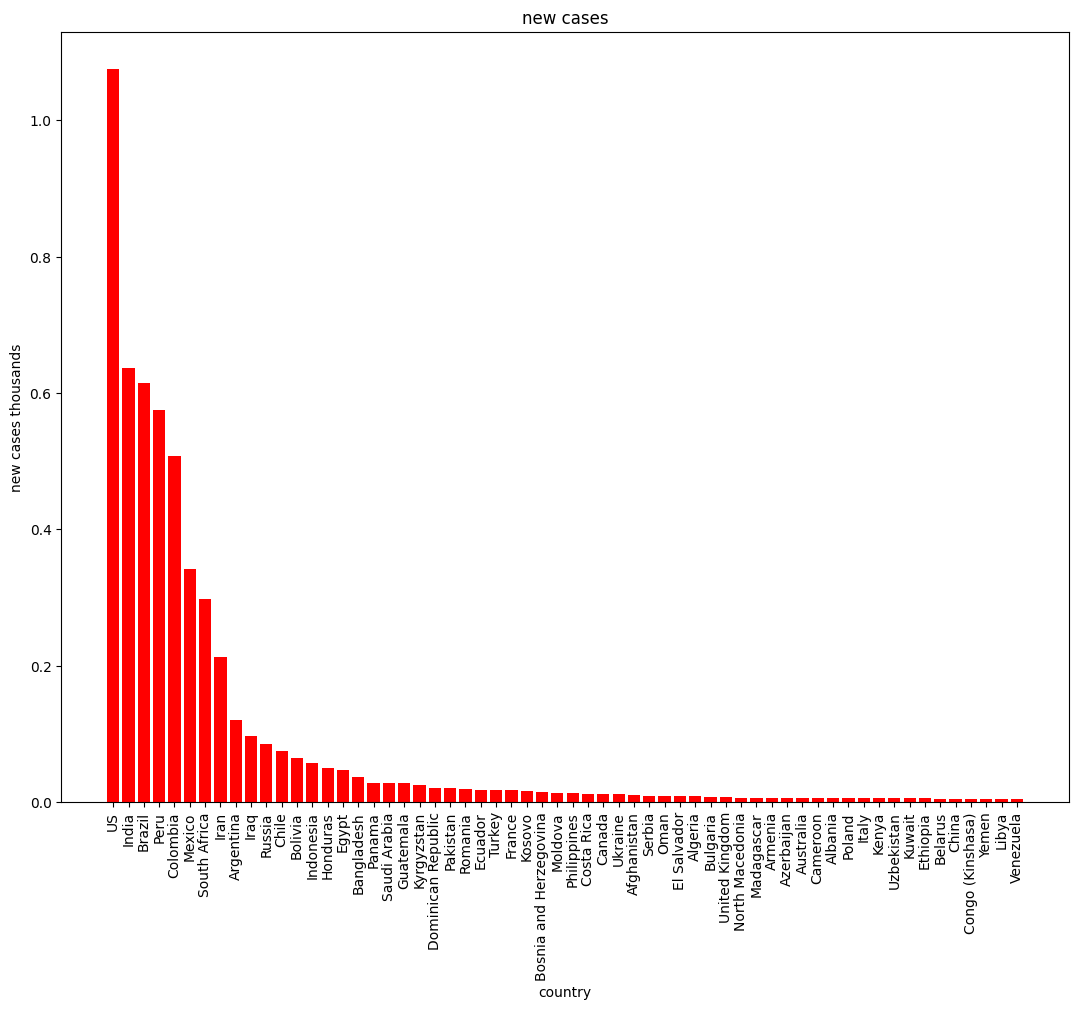

In [19]:
total = new_death.sort_values(ascending=False).head(60)
plt.figure(figsize=(13,10))
plt.bar(total.index, total.values/1e3, color = "red" )
plt.xlabel("country")
plt.ylabel("new cases thousands")
plt.title("new cases")
plt.xticks(rotation = 90)
plt.show()

In [20]:
new_recovered = covid.groupby("Country/Region")["New recovered"].sum().sort_values(ascending=False)  #total new recovered by country
new_recovered.head(50)

,New recovered
Country/Region,
Brazil,33728
India,33598
US,27941
Colombia,11494
South Africa,9848
Mexico,8588
Peru,4697
Pakistan,3592
Russia,3077


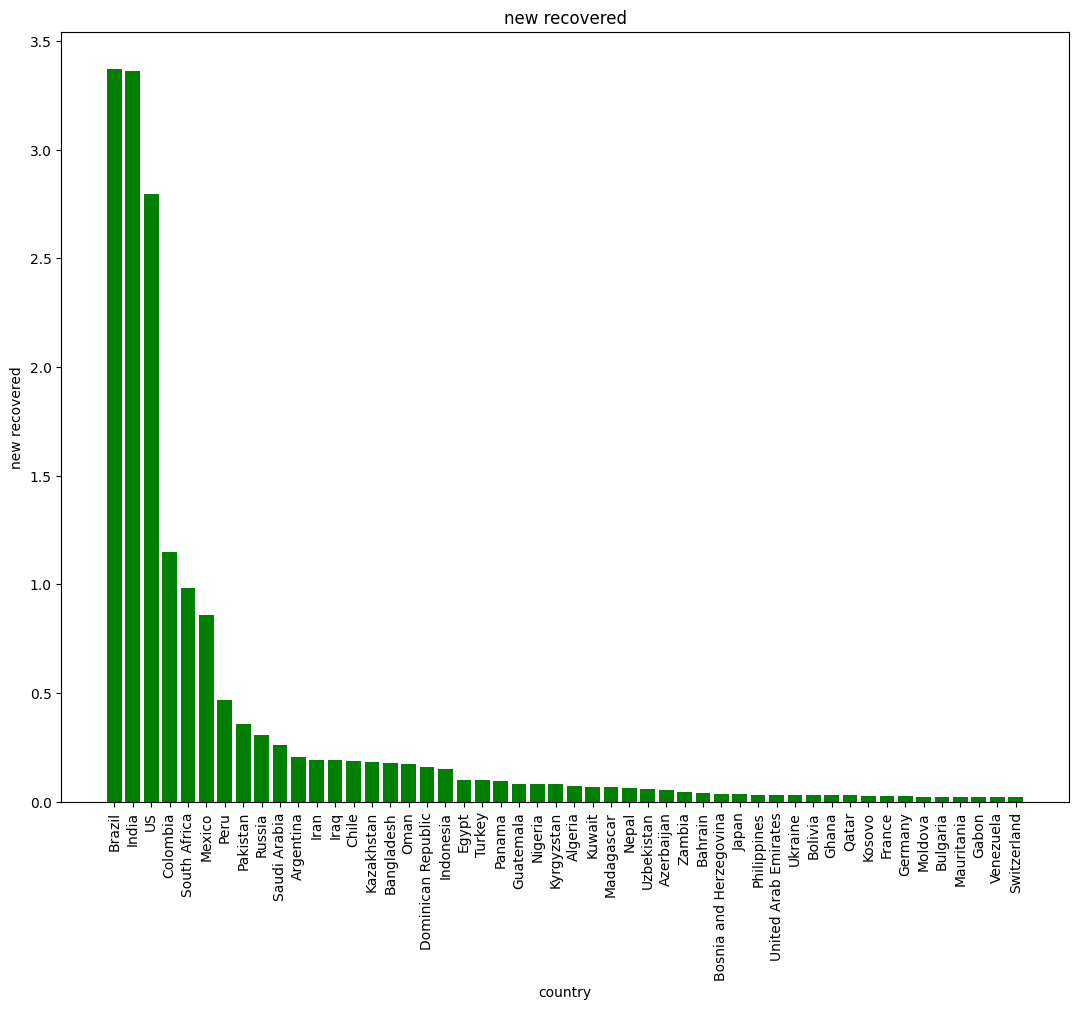

In [21]:
total = new_recovered.sort_values(ascending=False).head(50)
plt.figure(figsize=(13,10))
plt.bar(total.index,total.values/1e4, color = "green")
plt.xlabel("country")
plt.ylabel("new recovered")
plt.title("new recovered")
plt.xticks(rotation = 90)
plt.show()

In [22]:
who_Region = covid.groupby("Country/Region")["WHO Region"].sum().sort_index(ascending=True)  # region by country
who_Region

,WHO Region
Country/Region,
Afghanistan,Eastern Mediterranean
Albania,Europe
Algeria,Africa
Andorra,Europe
Angola,Africa
...,...
West Bank and Gaza,Eastern Mediterranean
Western Sahara,Africa
Yemen,Eastern Mediterranean


In [26]:
last_week_confirmed = covid.groupby("Country/Region")["Confirmed last week"].sum().sort_values(ascending=False)
last_week_confirmed.head(60)

,Confirmed last week
Country/Region,
US,3834677
Brazil,2118646
India,1155338
Russia,776212
South Africa,373628
Peru,357681
Mexico,349396
Chile,333029
United Kingdom,296944


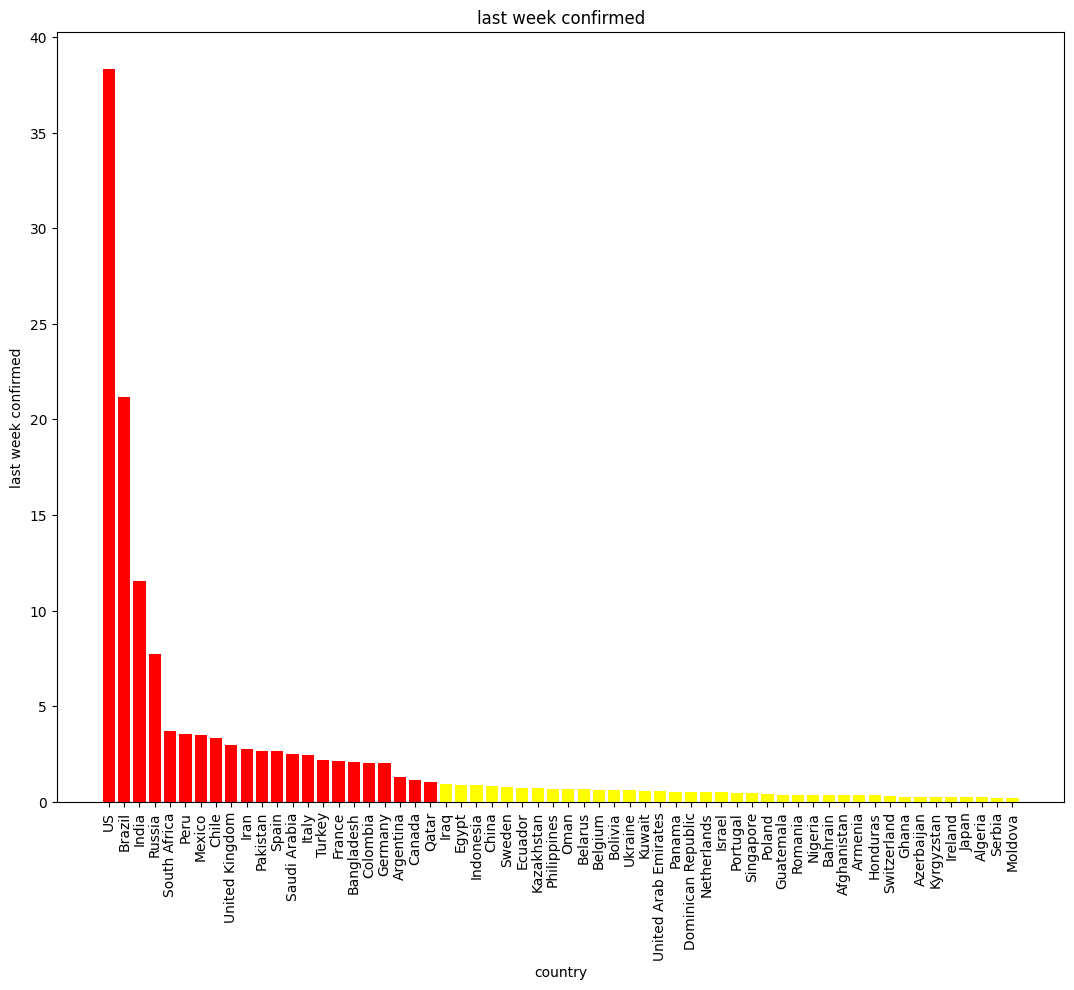

In [28]:
total  = last_week_confirmed.sort_values(ascending=False).head(60)
colors = ["red" if val >=100000 else "yellow" for val in total]
plt.figure(figsize=(13,10))
plt.bar(total.index, total.values/1e5, color = colors)
plt.xlabel("country")
plt.ylabel("last week confirmed")
plt.title("last week confirmed")
plt.xticks(rotation = 90)
plt.show()

In [30]:
covid.to_csv("cleaned.csv" , index = True)
from google.colab import files
files.download("cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# conclusion

1.this is covid dataset and there is no null values in any column having clean data.

2.further analysis by pandas and matplotlib and find insights from this data.

3.There is Total confirmed cases:  16480485
Total death cases:  654036
Total recovered cases:  9468087
Total active cases:  6358362

4.top country where cases is high that is usa and India confirmed and death but recovery is also high.

#